In [ ]:
!pip install opencv-python-headless numpy matplotlib

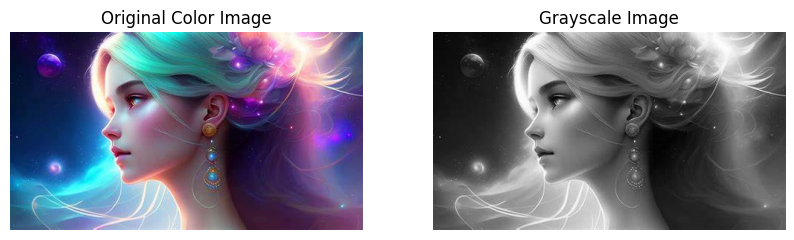

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_color = cv2.imread('/content/img2.jpg')  # Replace with your image path
image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# Convert the color image to grayscale
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

# Display images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Color Image')
plt.imshow(image_color)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Grayscale Image')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.show()


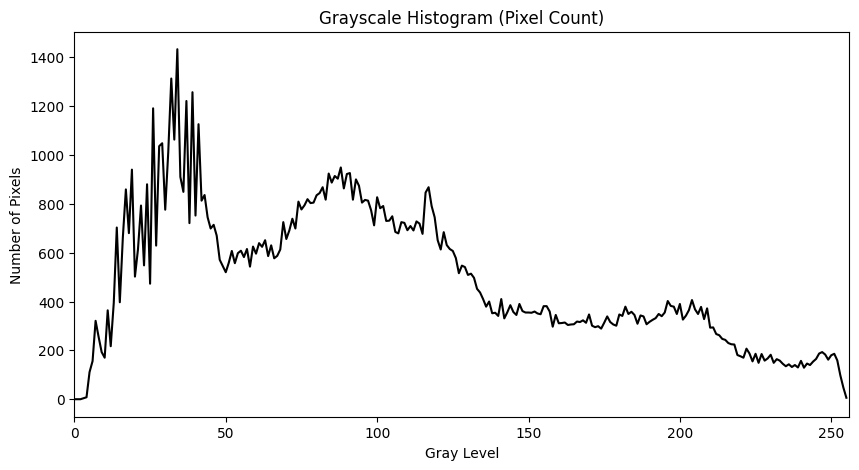

In [ ]:
# Histogram for Grayscale Image
hist_gray = cv2.calcHist([image_gray], [0], None, [256], [0,256])

plt.figure(figsize=(10,5))
plt.title('Grayscale Histogram (Pixel Count)')
plt.xlabel('Gray Level')
plt.ylabel('Number of Pixels')
plt.plot(hist_gray, color='black')
plt.xlim([0,256])
plt.show()


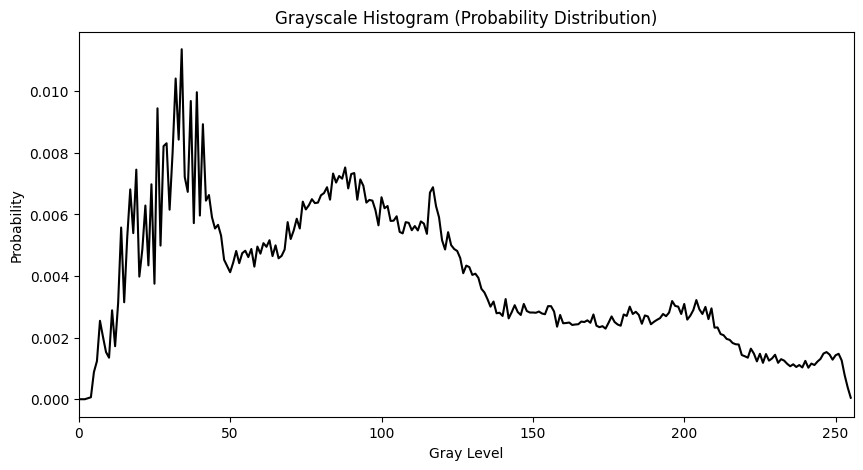

In [ ]:
# Normalized Histogram (Probability Distribution)
prob_gray = hist_gray / hist_gray.sum()

plt.figure(figsize=(10,5))
plt.title('Grayscale Histogram (Probability Distribution)')
plt.xlabel('Gray Level')
plt.ylabel('Probability')
plt.plot(prob_gray, color='black')
plt.xlim([0,256])
plt.show()


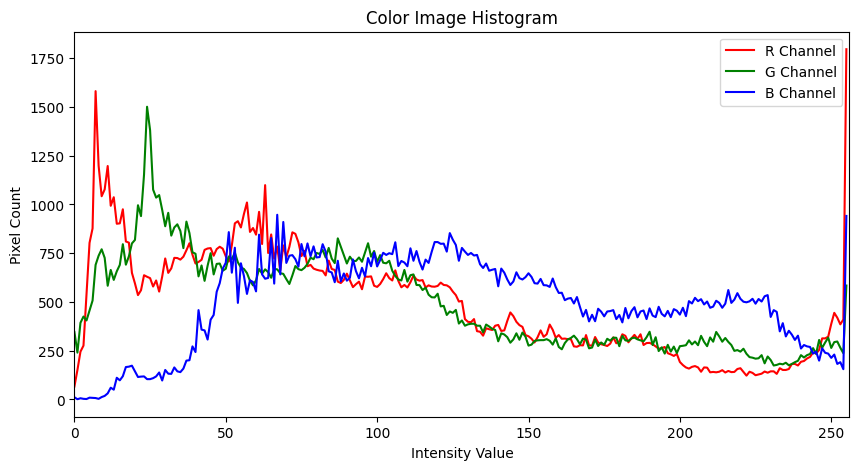

In [ ]:
# Split into channels
channels = ('r', 'g', 'b')
colors = ('red', 'green', 'blue')

plt.figure(figsize=(10,5))
plt.title('Color Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')

for i, color in enumerate(channels):
    hist = cv2.calcHist([image_color], [i], None, [256], [0,256])
    plt.plot(hist, color=colors[i], label=f'{color.upper()} Channel')
    plt.xlim([0,256])

plt.legend()
plt.show()


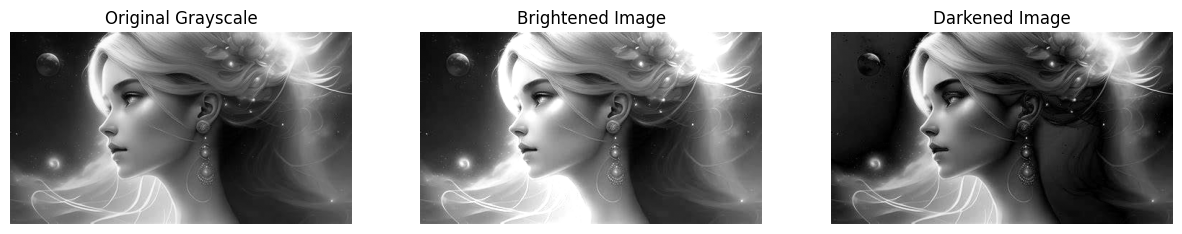

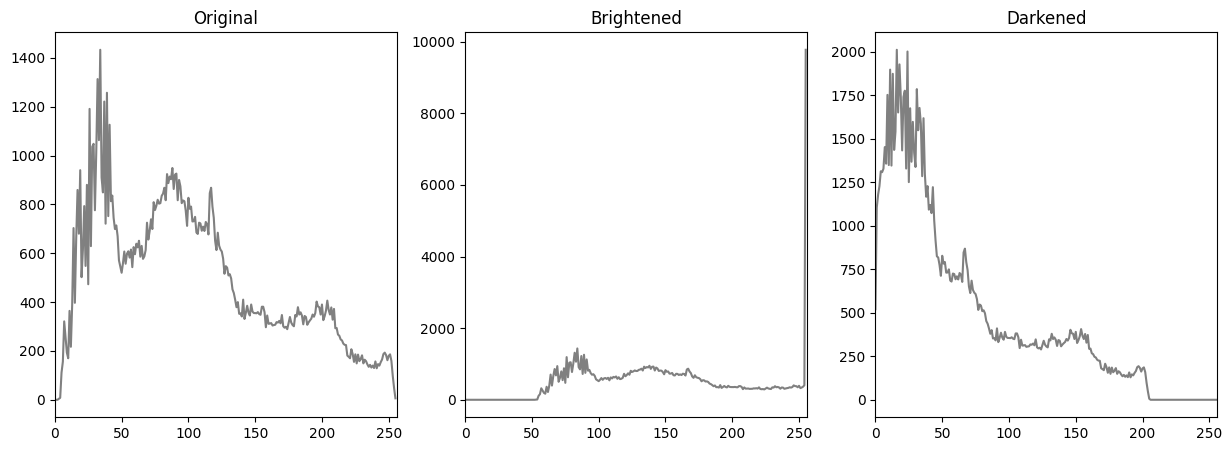

In [ ]:
# Increase brightness
bright_image = cv2.convertScaleAbs(image_gray, alpha=1, beta=50)
dark_image = cv2.convertScaleAbs(image_gray, alpha=1, beta=-50)

# Display images
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Original Grayscale')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Brightened Image')
plt.imshow(bright_image, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Darkened Image')
plt.imshow(dark_image, cmap='gray')
plt.axis('off')

plt.show()

# Plot histograms
plt.figure(figsize=(15,5))

for i, img in enumerate([image_gray, bright_image, dark_image]):
    plt.subplot(1,3,i+1)
    plt.title(['Original', 'Brightened', 'Darkened'][i])
    hist = cv2.calcHist([img], [0], None, [256], [0,256])
    plt.plot(hist, color='gray')
    plt.xlim([0,256])

plt.show()


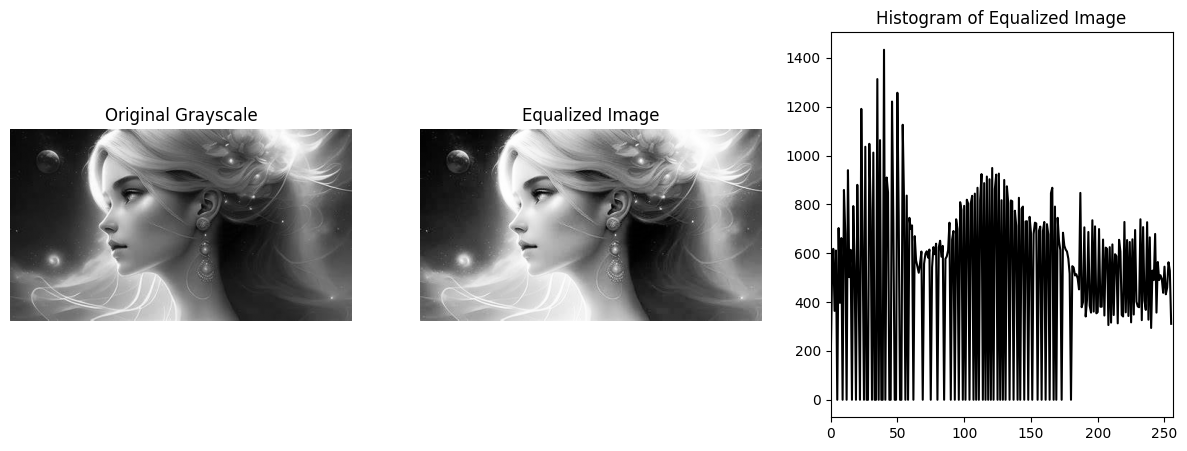

In [ ]:
# Histogram Equalization
equalized_image = cv2.equalizeHist(image_gray)

# Display
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Original Grayscale')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Histogram of Equalized Image')
hist_eq = cv2.calcHist([equalized_image], [0], None, [256], [0,256])
plt.plot(hist_eq, color='black')
plt.xlim([0,256])

plt.show()


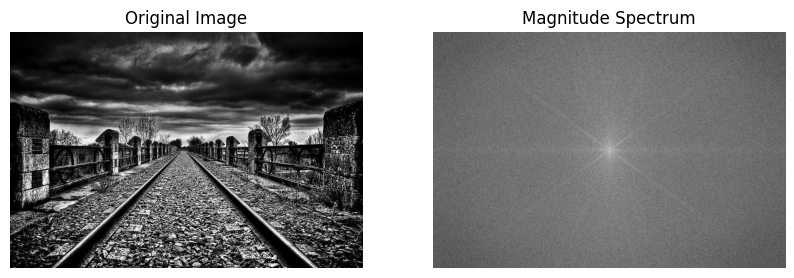

In [ ]:
# Load grayscale image
image = cv2.imread('/content/img1.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the FFT
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Display magnitude spectrum
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Magnitude Spectrum')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.show()


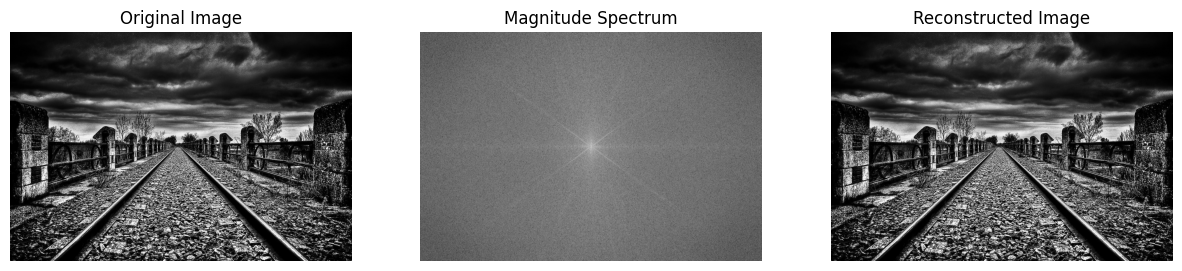

In [ ]:
# Inverse FFT
f_ishift = np.fft.ifftshift(fshift)
img_reconstructed = np.fft.ifft2(f_ishift)
img_reconstructed = np.abs(img_reconstructed)

# Display reconstructed image
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Magnitude Spectrum')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Reconstructed Image')
plt.imshow(img_reconstructed, cmap='gray')
plt.axis('off')

plt.show()


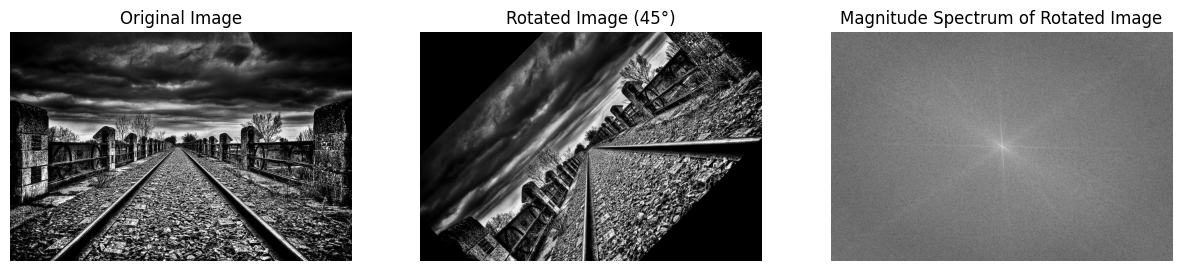

In [ ]:
# Rotate image by 45 degrees
(rows, cols) = image.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated_image = cv2.warpAffine(image, M, (cols, rows))

# FFT of rotated image
f_rotated = np.fft.fft2(rotated_image)
fshift_rotated = np.fft.fftshift(f_rotated)
magnitude_spectrum_rotated = 20 * np.log(np.abs(fshift_rotated))

# Display
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Rotated Image (45°)')
plt.imshow(rotated_image, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Magnitude Spectrum of Rotated Image')
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.axis('off')

plt.show()